In [1]:
#importing all the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import MinMaxScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading the data abd storing it in a dataframe
countrydata=pd.read_csv('Country-data.csv')

In [3]:
#let us have a look at the data
countrydata.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
#printing the rows and columns
countrydata.shape

(167, 10)

In [5]:

countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


So for this assignment we have a series of steps to be followed the steps are as follows-

1)Data Quality Check

2)EDA: Univariate and Bivariate

3)Outlier Analaysis

4)Scaling

5)Hopkin's Test

6)Find the best value of k using SSD Elbow, Silhoutte Score

7)Using the final value of k, perform the kMeans analysis

8)Visualize it using scatterplot

9)Perform Cluster profiling: GDPP, CHILD_MORT and INCOME.

10)Hierarchial Clustering: Single linkage, Complete Linkage

so lets go with our first step that is data check

As we can see in the dataframe we have the columns with Exports,Health and import with percentage of values as per GDP so lets change them to our actual values 

In [6]:
countrydata

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [7]:
countrydata['exports']=(countrydata['exports']*countrydata['gdpp'])/100
countrydata['health']=(countrydata['health']*countrydata['gdpp'])/100


In [8]:
countrydata['imports']=(countrydata['imports']*countrydata['gdpp'])/100

In [9]:
#lets have a look at the data again
countrydata.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [10]:
#the another major step in the data check is to find the missing values

In [11]:
countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

so as we see none of them has any missing values so lets go forward with our next step that is univariate and bivariate analysis

so now we have a country column let us convert them into numerical values

In [12]:
len(countrydata['country'].unique())

167

so lets have a look of the numerical values

In [13]:
countrydata.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [14]:
#so now lets have a look of how the numerical values are distributed 

In [15]:
num_cols=countrydata[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

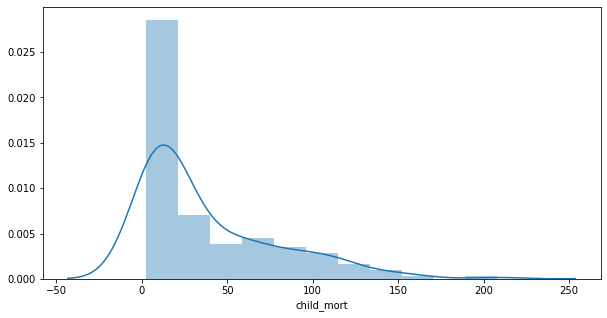

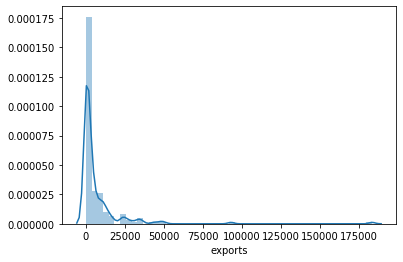

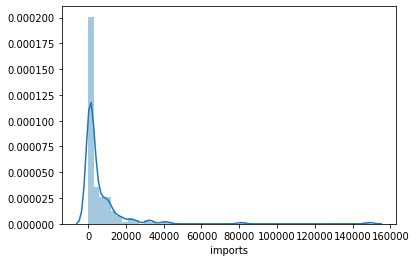

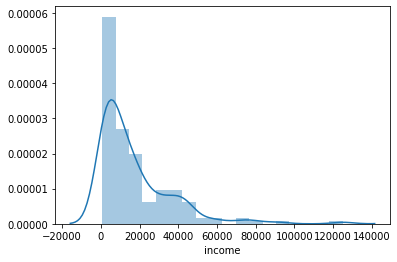

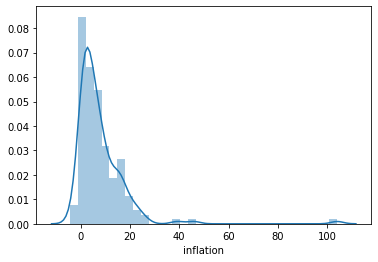

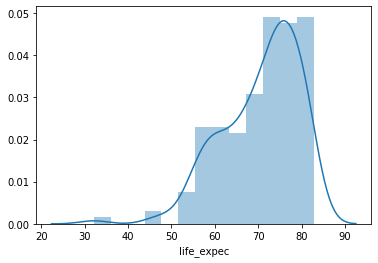

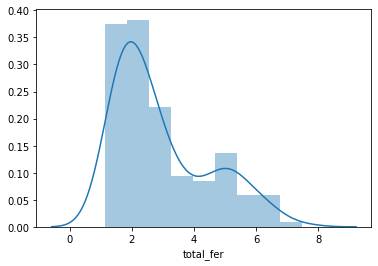

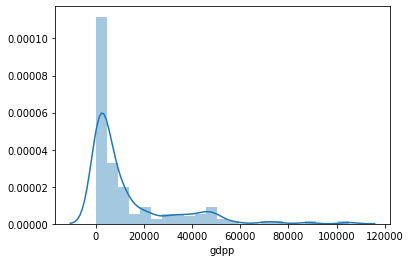

In [16]:
plt.figure(figsize=[10,5])
for h in num_cols.columns:
    sns.distplot(countrydata[h])
    plt.show()


As we can see all the columns in the data  are normally distributed  except total_fer that is bi modally distributed

so we can have a insight that total_fer is meant for distribution where as others are not

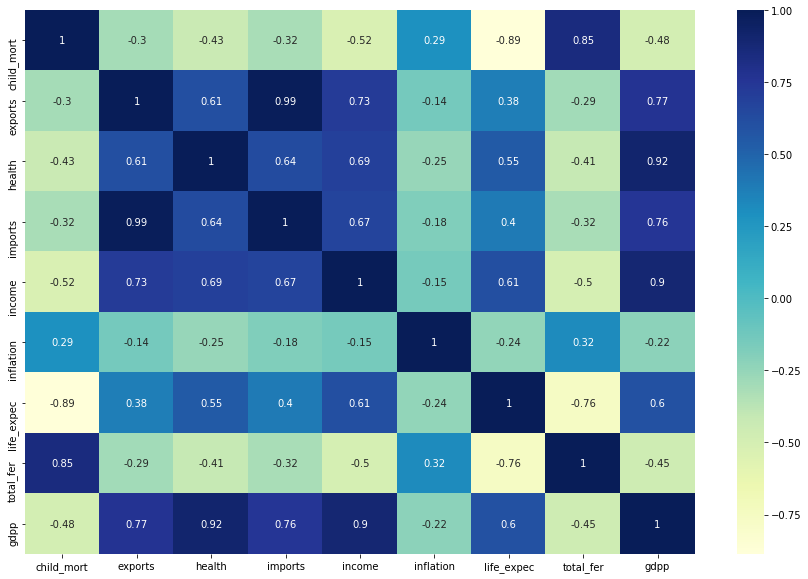

In [17]:
#lets draw a corelation matrix to see how the data is related with each other
plt.figure(figsize=[15,10])
sns.heatmap(countrydata.corr(),annot=True,cmap="YlGnBu")

We get the following insights from the heat map

1)health and exports are highly coprelated with each other
2)exports and imports are highly corelated with each other
3)health and gdpp are highly corelated with each other
4)income and exports are highly corelated with each other

In [18]:
#we can also draw a pairplot to see the corelation between variables

<Figure size 720x864 with 0 Axes>

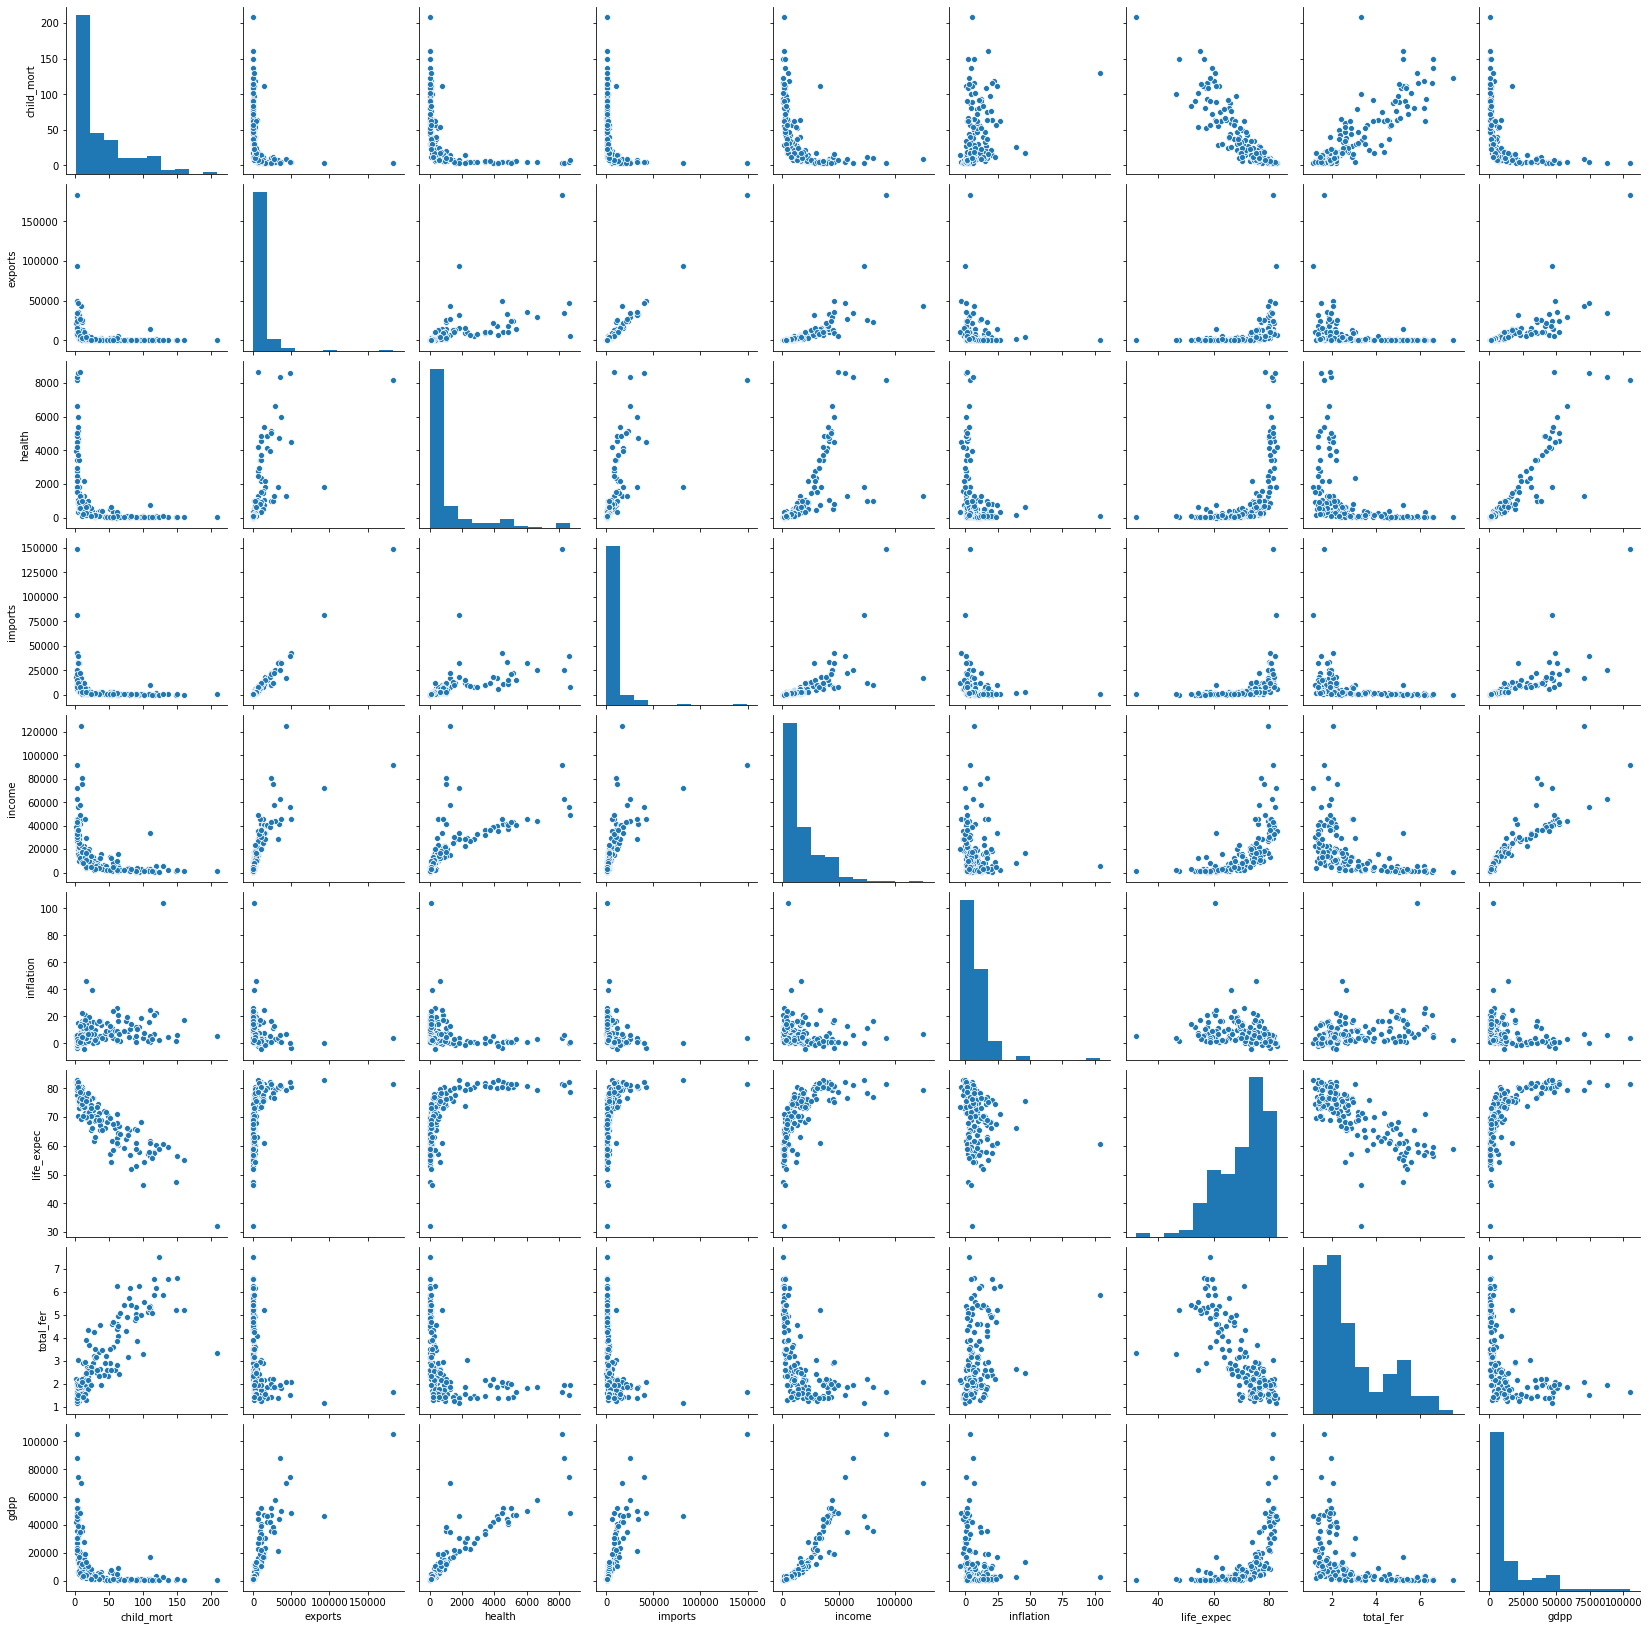

In [19]:
plt.figure(figsize=[10,12])
sns.pairplot(countrydata[1:])
plt.show()

as we can see there are some columns which are negatively corelated wid each other like we have exports and total feR and child_mort and gdpp which are negatively corelated

so the next step in our assignment is to check the outlier so lets go and do it

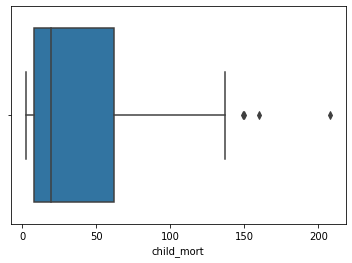

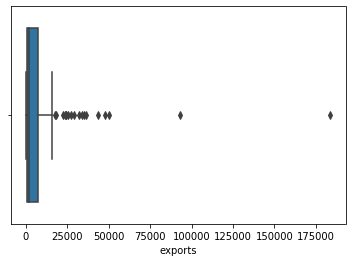

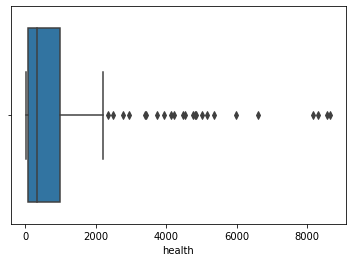

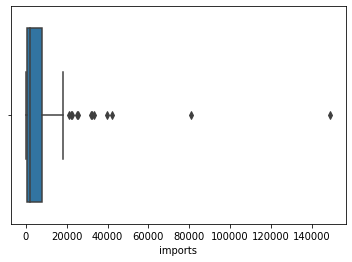

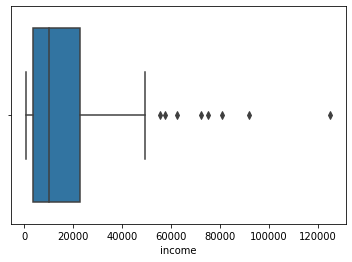

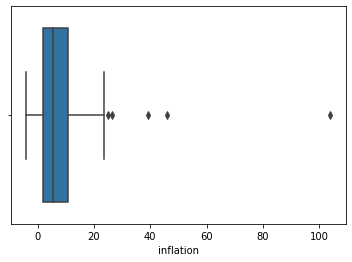

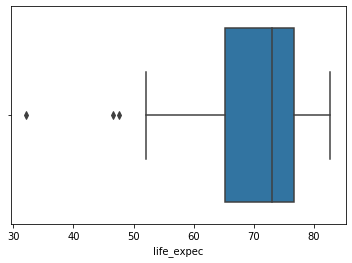

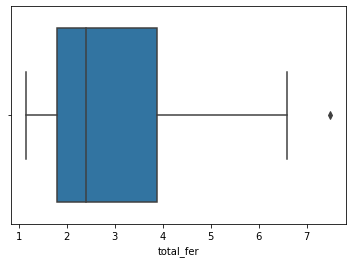

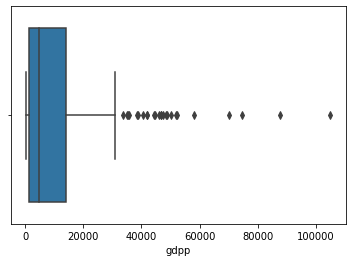

In [20]:

for x in num_cols.columns:
    sns.boxplot(countrydata[x])
    plt.show()

so as we can see every column has a outlier  let us deal with it one by one

so the first column is child_mort it has outliers statistically  but we should not remove this from the buisness point of view because if the death is more means they are more need of financial help so let us not remove this outliers

The second column exports has outliers  as we can see in the figure and we should remove the outliers from the buisness point of view because if the country is exporting a lot it means it has plenty of money and our objective is to find that  country which is legging financially


so one of the method to deal with outliers is to cap it

In [21]:
Q1 = countrydata['exports'].quantile(0.25)
Q3 = countrydata['exports'].quantile(0.75)

In [22]:
IQR = Q3 - Q1  

In [23]:
#the capping limit for the the column exports
Q3 + 1.5 *IQR

17524.29

In [24]:
countrydata=countrydata[countrydata['exports']<(Q3 + 1.5 *IQR)]

In [25]:
#lets have a look at the data
countrydata

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[149 rows x 10 columns]

so the next column is health spending per capita so if we look the image we do have outliers and as per buisness point of view i want to remove the upper range outliers as if the country has lot of money to spend on health then usually we donot need that country my focus is on finding that country which has less money to spend on their health

In [26]:
#so lets remove the upper range outliers in health column

In [27]:
Q1 = countrydata['health'].quantile(0.25)
Q3 = countrydata['health'].quantile(0.75)

In [28]:
IQR=Q3-Q1

In [29]:
IQR

583.629

In [30]:
countrydata=countrydata[countrydata['health']<(Q3 + 1.5 *IQR)]

In [31]:
countrydata

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[132 rows x 10 columns]

so let us have a look at the imports column we can see that we have outliers in the upper range and i donot want to remove this outlier from the buisness point of view beacuse when a country is importing goods and services it means it has scarcity of money and our objective is to find those countries

so the next column is income and we do have outlers in the upper range and as per the buisness point of view we should remove the upper range outliers because  we donot need high income people rather we need those people who are having scarcity of money


In [32]:
Q1 = countrydata['income'].quantile(0.25)
Q3 = countrydata['income'].quantile(0.75)

In [33]:
IQR = Q3 - Q1  

In [34]:
IQR

11765.0

In [35]:
countrydata=countrydata[countrydata['income']<(Q3 + 1.5 *IQR)]

similarily for the inflation we should cap the low range outliers

so as we can see in the figure inflation do not has low range outliers so let us move to the next column

so the next column is life_expec so as we can see it has outliers and from the buisness  point of view if the life expectancy is more than spending is more so those countries will have finance scarcity so lets cap the low range

In [36]:
Q1 = countrydata['life_expec'].quantile(0.25)
Q3 = countrydata['life_expec'].quantile(0.75)

In [37]:
IQR=Q3-Q1

In [38]:
IQR

12.725000000000009

In [39]:
countrydata=countrydata[countrydata['life_expec']>Q1 - 1.5 *IQR]

In [40]:
countrydata.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [41]:
#similarily for total fertitliy we should cap the lower range outliers

In [42]:
Q1 = countrydata['total_fer'].quantile(0.25)
Q3 = countrydata['total_fer'].quantile(0.75)

In [43]:
IQR=Q3-Q1

In [44]:
IQR

2.5650000000000004

In [45]:
countrydata=countrydata[countrydata['total_fer']>Q1 - 1.5 *IQR]

similarly for the last column gdpp we should cap the upper range outliers

In [46]:
Q1 = countrydata['gdpp'].quantile(0.25)
Q3 = countrydata['gdpp'].quantile(0.75)

In [47]:
IQR=Q3-Q1

In [48]:
IQR

5515.0

In [49]:
countrydata=countrydata[countrydata['gdpp']<(Q3 + 1.5 *IQR)]

In [50]:
#so lets look at the final data we have for modelling
countrydata

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
163            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
164              Vietnam        23.3   943.20   89.6040  1050.620    4490   
165                Yemen        56.3   393.00   67.8580   450.640    4480   
166               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[125 rows x 10 columns]

So the next step is the hoopkins test which tells whether the data is meant for clustering or not

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
If the value is between {0.01, ...,0.3}, the data is regularly spaced.
If the value is around 0.5, it is random.
If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [51]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [52]:
hopkins(countrydata.drop('country',axis=1))

0.8463169768525761

so now let us scale the data

In [53]:
scale=MinMaxScaler()

In [54]:
countrydatascale=scale.fit_transform(countrydata.drop('country', axis=1))

In [55]:
type(countrydatascale)

numpy.ndarray

In [56]:
countrydatascale=pd.DataFrame(countrydatascale)

so as we can see the hopkins is returning a good score so we can say that the data is meant for clustering

Find the best value of k using SSD Elbow, Silhoutte Score

In [57]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k,max_iter=50).fit(countrydatascale)
    ss.append([k, silhouette_score(countrydatascale, kmean.labels_)])

sil = pd.DataFrame(ss)

In [58]:
sil

0         1
0   2  0.414261
1   3  0.412971
2   4  0.362040
3   5  0.286356
4   6  0.279428
5   7  0.297319
6   8  0.264182
7   9  0.280909
8  10  0.259618

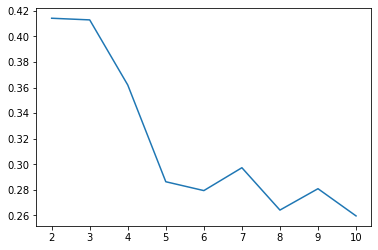

In [59]:
plt.plot(sil[0], sil[1]);

We see the highest Silhoutte score at 2. However, in practice, it is never to be considered.
Therefore, we choose the next highest value i.e. 3.


now lets perform the kmeans analaysis using the final value of k ie..3

In [60]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(countrydatascale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
#printimng the value of labels
kmeans.labels_

array([2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2], dtype=int32)

lets now attach the lebels  to the data

In [62]:
countrydata.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [63]:
countrydata.shape

(125, 10)

In [64]:
kmeans.labels_.shape

(125,)

In [65]:
countrydata['labels']=kmeans.labels_

In [66]:
countrydata.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  labels  
0       9.44        56.2       5.82    553       2  
1       4.49        76.3       1.65   4090       1  
2      16.10        76.5       2.89   4460       1  
3      22.40        60.1       6.16   3530       2  
4       1.44        76.8       2.13  12200       0

# Visualize it using scatterplot

as per the statement we need to categorise the data using gdpp,child_mort and income so lets see how these values are related to each other

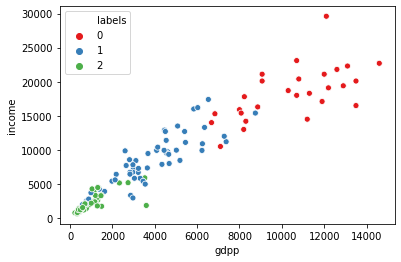

In [67]:
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=countrydata,palette='Set1')


as we can see that the 2nd label has more gross domestic values then the other two

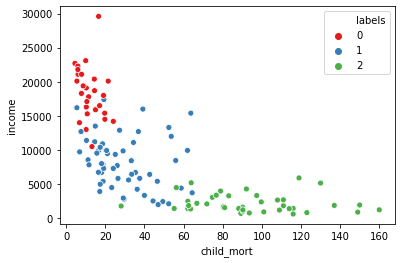

In [68]:
sns.scatterplot(x='child_mort', y='income', hue= 'labels', data=countrydata,palette='Set1')

from the figure we can see that label 2 cluster has more income than the other two

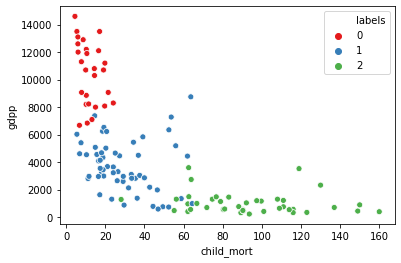

In [69]:
sns.scatterplot(x='child_mort', y='gdpp', hue= 'labels', data=countrydata,palette='Set1')

from the figure we can see that the label o cluster has more child mortality rate than 1 and 2

# Perform cluster profiling

We are required to find that cluster which is having high child mort and with low income and low gdpp

In [70]:
countrydata[['gdpp','income','child_mort','labels']].groupby('labels').mean()

gdpp        income  child_mort
labels                                        
0       10438.148148  18381.481481   12.148148
1        3705.473684   8220.175439   29.705263
2        1019.756098   2195.439024   93.060976

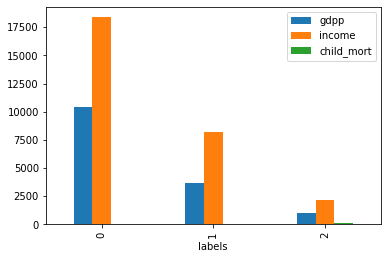

In [71]:
countrydata[['gdpp','income','child_mort','labels']].groupby('labels').mean().plot.bar()

as we can see  from the above graph label 0 is having low income and low gdpp and high mortality as compared to others so our desired cluster is 0

so lets have a look at the data with labels equal to 0

In [72]:
c0=countrydata[countrydata['labels']==0]

In [73]:
c0

country  child_mort   exports    health   imports  income  \
4    Antigua and Barbuda        10.3   5551.00   735.660   7185.80   19100   
5              Argentina        14.5   1946.70   834.300   1648.00   18700   
22                Brazil        19.8   1198.40  1009.120   1321.60   14500   
24              Bulgaria        10.8   3433.68   469.908   3625.20   15300   
33                 Chile         8.7   4863.30  1026.840   4037.70   19400   
39            Costa Rica        10.2   2722.40   893.800   2870.00   13000   
41               Croatia         5.5   5076.00  1047.600   5143.50   20100   
51               Estonia         4.5  10964.60   880.380  10030.20   22700   
67               Hungary         6.0  10715.80   960.230  10021.50   22300   
79            Kazakhstan        21.5   4008.94   389.103   2711.93   20100   
85                Latvia         7.8   6068.10   754.840   6226.30   18300   
86               Lebanon        10.3   3171.88   622.858   5333.72   16300   
89                 Libya        16.6   7937.60   469.480   5094.10   29600   
90             Lithuania         6.1   7836.00   844.800   8064.00   21100   
95              Malaysia         7.9   7881.83   398.173   6439.70   21100   
96              Maldives        13.2   5509.60   449.430   4643.40   10500   
100            Mauritius        15.0   4096.00   480.000   4976.00   15900   
104           Montenegro         6.8   2471.60   608.548   4188.36   14000   
117               Panama        19.7   5656.00   654.480   6318.56   15400   
121               Poland         6.0   5052.60   939.960   5304.60   21800   
124              Romania        11.5   2682.98   459.234   3193.24   17800   
125               Russia        10.0   3124.40   543.560   2257.70   23100   
131           Seychelles        14.4  10130.40   367.200  11664.00   20400   
143             Suriname        24.1   4357.50   581.830   3187.20   14200   
153               Turkey        19.1   2182.80   721.180   2728.50   18000   
160              Uruguay        10.6   3129.70   993.650   3022.60   17100   
163            Venezuela        17.1   3847.50   662.850   2376.00   16500   

     inflation  life_expec  total_fer   gdpp  labels  
4        1.440        76.8       2.13  12200       0  
5       20.900        75.8       2.37  10300       0  
22       8.410        74.2       1.80  11200       0  
24       1.110        73.9       1.57   6840       0  
33       8.960        79.1       1.88  12900       0  
39       6.570        80.4       1.92   8200       0  
41       0.821        76.3       1.55  13500       0  
51       1.740        76.0       1.72  14600       0  
67       2.330        74.5       1.25  13100       0  
79      19.500        68.4       2.60   9070       0  
85      -0.812        73.1       1.36  11300       0  
86       0.238        79.8       1.61   8860       0  
89      14.200        76.1       2.41  12100       0  
90       2.380        73.2       1.50  12000       0  
95       7.270        74.5       2.15   9070       0  
96       2.880        77.9       2.23   7100       0  
100      1.130        73.4       1.57   8000       0  
104      1.600        76.4       1.77   6680       0  
117      2.590        77.8       2.62   8080       0  
121      1.660        76.3       1.41  12600       0  
124      3.530        73.7       1.59   8230       0  
125     14.200        69.2       1.57  10700       0  
131     -4.210        73.4       2.17  10800       0  
143      7.200        70.3       2.52   8300       0  
153      7.010        78.2       2.15  10700       0  
160      4.910        76.4       2.08  11900       0  
163     45.900        75.4       2.47  13500       0

In [74]:
c0['labels'].value_counts()

0    27
Name: labels, dtype: int64

so as we got our desired cluster then lets arrange the countries in highest order of importance

In [75]:
c0.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head()

country  child_mort  exports   health  imports  income  inflation  \
104  Montenegro         6.8  2471.60  608.548  4188.36   14000       1.60   
24     Bulgaria        10.8  3433.68  469.908  3625.20   15300       1.11   
96     Maldives        13.2  5509.60  449.430  4643.40   10500       2.88   
100   Mauritius        15.0  4096.00  480.000  4976.00   15900       1.13   
117      Panama        19.7  5656.00  654.480  6318.56   15400       2.59   

     life_expec  total_fer  gdpp  labels  
104        76.4       1.77  6680       0  
24         73.9       1.57  6840       0  
96         77.9       2.23  7100       0  
100        73.4       1.57  8000       0  
117        77.8       2.62  8080       0

so the first 5 countries which are in the direct need of financial assistance are

1)Burundi

2)Liberia

3)Congo, Dem. Rep.

4)Niger

5)Sierra Leone

# Hierarchial Clustering: Single linkage , complete linkage  and average 

In [76]:
countrydatascale.head()

0         1         2         3         4         5         6  \
0  0.551125  0.004946  0.028118  0.021233  0.034528  0.126144  0.286136   
1  0.077814  0.104357  0.246501  0.170370  0.321514  0.080399  0.879056   
2  0.146624  0.156114  0.167341  0.120016  0.423959  0.187691  0.884956   
3  0.736334  0.200493  0.084833  0.129784  0.182505  0.245911  0.401180   
4  0.037299  0.506217  0.698544  0.616045  0.637819  0.052213  0.893805   

          7         8  
0  0.732372  0.022409  
1  0.064103  0.268564  
2  0.262821  0.294314  
3  0.786859  0.229591  
4  0.141026  0.832974

In [77]:
countrydatascale.columns=countrydata.columns[1:10]

In [78]:
countrydatascale

child_mort   exports    health   imports    income  inflation  \
0      0.551125  0.004946  0.028118  0.021233  0.034528   0.126144   
1      0.077814  0.104357  0.246501  0.170370  0.321514   0.080399   
2      0.146624  0.156114  0.167341  0.120016  0.423959   0.187691   
3      0.736334  0.200493  0.084833  0.129784  0.182505   0.245911   
4      0.037299  0.506217  0.698544  0.616045  0.637819   0.052213   
..          ...       ...       ...       ...       ...        ...   
120    0.158842  0.126140  0.138294  0.134141  0.080749   0.063118   
121    0.081029  0.350838  0.628181  0.203659  0.548136   0.463081   
122    0.120900  0.085933  0.074202  0.090023  0.133869   0.150725   
123    0.333119  0.035748  0.053187  0.038581  0.133524   0.257000   
124    0.505466  0.049174  0.070713  0.038624  0.092132   0.168284   

     life_expec  total_fer      gdpp  
0      0.286136   0.732372  0.022409  
1      0.879056   0.064103  0.268564  
2      0.884956   0.262821  0.294314  
3      0.401180   0.786859  0.229591  
4      0.893805   0.141026  0.832974  
..          ...        ...       ...  
120    0.486726   0.360577  0.190619  
121    0.852507   0.195513  0.923446  
122    0.784661   0.112179  0.075092  
123    0.619469   0.548077  0.075092  
124    0.162242   0.665064  0.085531  

[125 rows x 9 columns]

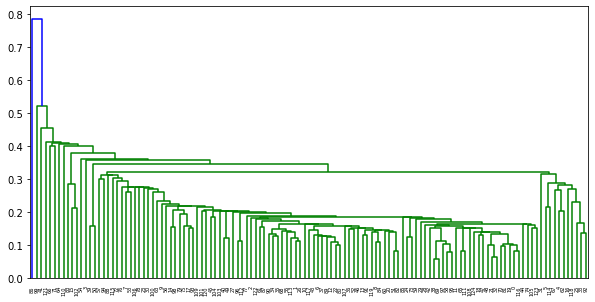

In [79]:
#single linkage
plt.figure(figsize=[10,5])
mergings = linkage(countrydatascale,method="single", metric='euclidean')
dendrogram(mergings)

plt.show()


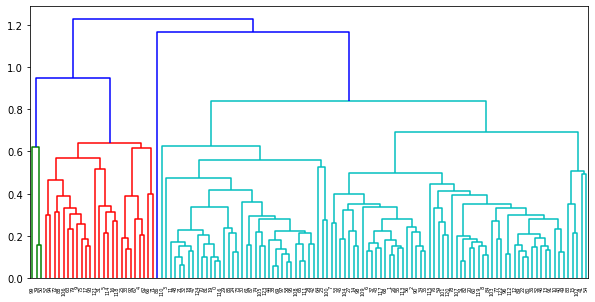

In [80]:
#average linkage

plt.figure(figsize=[10,5])
mergings = linkage(countrydatascale,method="average", metric='euclidean')
dendrogram(mergings)

plt.show()

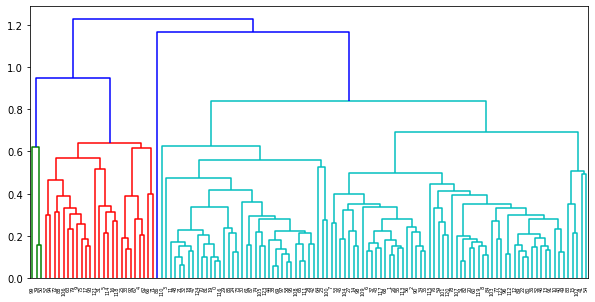

In [81]:
#complete linkage
plt.figure(figsize=[10,5])
mergings = linkage(countrydatascale,method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

as we can see in the figure complete linkage provides a good chance for analaysis

In [82]:
#so lets cut the dendoogram which  gives 3 clusters

In [83]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [84]:
countrydatascale['cluster_labels'] = cluster_labels
countrydatascale.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.551125  0.004946  0.028118  0.021233  0.034528   0.126144    0.286136   
1    0.077814  0.104357  0.246501  0.170370  0.321514   0.080399    0.879056   
2    0.146624  0.156114  0.167341  0.120016  0.423959   0.187691    0.884956   
3    0.736334  0.200493  0.084833  0.129784  0.182505   0.245911    0.401180   
4    0.037299  0.506217  0.698544  0.616045  0.637819   0.052213    0.893805   

   total_fer      gdpp  cluster_labels  
0   0.732372  0.022409               0  
1   0.064103  0.268564               0  
2   0.262821  0.294314               0  
3   0.786859  0.229591               0  
4   0.141026  0.832974               1

In [85]:
#plots

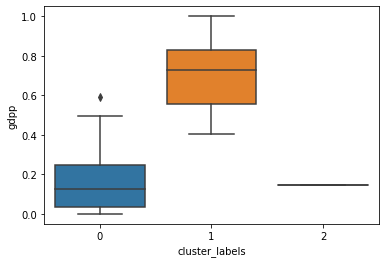

In [86]:
sns.boxplot(x='cluster_labels', y='gdpp', data=countrydatascale)

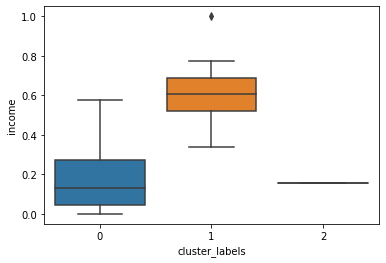

In [87]:
sns.boxplot(x='cluster_labels', y='income', data=countrydatascale)

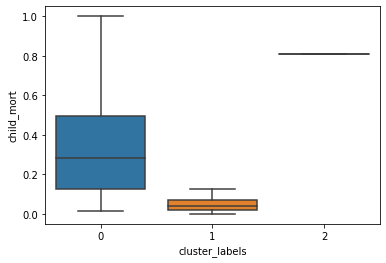

In [88]:
sns.boxplot(x='cluster_labels', y='child_mort', data=countrydatascale)